In [1]:
import torch
from sklearn.preprocessing import StandardScaler
import torch.utils.data as data_utils
import numpy as np


def create_inout_sequences_tra(data, tw, test_size):
    
    data = np.array(data)
    L = len(data)
    data = data[:(L//tw)*tw]
    scaler = StandardScaler()
    scaler = scaler.fit(data[:-tw*test_size])
    data = scaler.transform(data)
    
    x = []
    y = []
    
    for i in range(L//tw):
        i = i*tw
        train_seq = data[:,0:4][i:i+tw]
        train_label = data[:,4][i:i+tw]
        x.append(train_seq)
        y.append(train_label)

    y_train = torch.tensor(y[:-test_size])
    y_test = torch.tensor(y[-test_size:])
    x_train = torch.tensor(x[:-test_size])
    x_test = torch.tensor(x[-test_size:])  
    
    train_dataset = data_utils.TensorDataset(x_train, y_train)
    train_loader = data_utils.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

    test_dataset = data_utils.TensorDataset(x_test, y_test)
    test_loader = data_utils.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
    
    return train_loader, test_loader, scaler



In [2]:
import torch
from sklearn.preprocessing import StandardScaler
import torch.utils.data as data_utils
import numpy as np


def create_inout_sequences_opt(data, tw, test_size):
    
    data = np.array(data)
    L = len(data)
    data = data[:(L//tw)*tw]
    scaler = StandardScaler()
    scaler = scaler.fit(data[:-tw*test_size])
    data = scaler.transform(data)
    
    x = []
    y = []
    
    for i in range(L//tw):
        i = i*tw
        train_seq = data[:,0][i:i+tw]
        train_label = data[:,1][i:i+tw]
        x.append(train_seq)
        y.append(train_label)

    y_train = torch.tensor(y[:-test_size])
    y_test = torch.tensor(y[-test_size:])
    x_train = torch.tensor(x[:-test_size])
    x_test = torch.tensor(x[-test_size:])  
    
    train_dataset = data_utils.TensorDataset(x_train, y_train)
    train_loader = data_utils.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

    test_dataset = data_utils.TensorDataset(x_test, y_test)
    test_loader = data_utils.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
    
    return train_loader, test_loader, scaler



In [3]:
import torch
from sklearn.preprocessing import StandardScaler
import torch.utils.data as data_utils
import numpy as np


def create_inout_sequences_pm(data, tw, test_size):
    
    data = np.array(data)
    L = len(data)
    data = data[:(L//tw)*tw]
    scaler = StandardScaler()
    scaler = scaler.fit(data[:-tw*test_size])
    data = scaler.transform(data)
    
    x = []
    y = []
    
    for i in range(L//tw):
        i = i*tw
        train_seq = data[:,0:6][i:i+tw]
        train_label = data[:,6][i:i+tw]
        x.append(train_seq)
        y.append(train_label)

    y_train = torch.tensor(y[:-test_size])
    y_test = torch.tensor(y[-test_size:])
    x_train = torch.tensor(x[:-test_size])
    x_test = torch.tensor(x[-test_size:])  
    
    train_dataset = data_utils.TensorDataset(x_train, y_train)
    train_loader = data_utils.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

    test_dataset = data_utils.TensorDataset(x_test, y_test)
    test_loader = data_utils.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
    
    return train_loader, test_loader, scaler



In [4]:
import torch
from sklearn.preprocessing import StandardScaler
import torch.utils.data as data_utils
import numpy as np
import pandas as pd


def create_inout_sequences_chick(data, tw, test_size):
    
    data = np.array(data)
    L = len(data)
    data = data[:(L//tw)*tw]
    scaler = StandardScaler()
    scaler = scaler.fit(data[:-tw*test_size])
    data = scaler.transform(data)
    
    x = []
    y = []
    
    for i in range(L//tw):
        i = i*tw
        train_seq = data[:,0:4][i:i+tw]
        train_label = data[:,4][i:i+tw]
        x.append(train_seq)
        y.append(train_label)
    
    y_train = torch.tensor(y[:-test_size])
    y_test = torch.tensor(y[-test_size:])
    x_train = torch.tensor(x[:-test_size])
    x_test = torch.tensor(x[-test_size:])  
    # print(x_train[0])
    # print(y_train[0])
    train_dataset = data_utils.TensorDataset(x_train, y_train)
    train_loader = data_utils.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

    test_dataset = data_utils.TensorDataset(x_test, y_test)
    test_loader = data_utils.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
    
    return train_loader, test_loader, scaler



In [5]:
import torch
import torch.distributions as distribution

def init_network_weights(model):
    if type(model) == torch.nn.Linear:
        torch.nn.init.xavier_uniform_(model.weight)
        if model.bias is not None:
            model.bias.data.fill_(0.0)
            
def normal_distribution(mu, var):

    #var = torch.exp(0.5*logvar)
    normal = distribution.Normal(mu, var)
    return normal


def sample_from_normal(mu, var):
    normal = normal_distribution(mu, var)
    sample = normal.rsample()
    return sample

def loss_function(recon, data, Z_prior, Z_posterior, var = 1.0):

    normal = distribution.Normal(recon, var)
    log_likelihood = normal.log_prob(data).sum()

    
    prior = normal_distribution(Z_prior[0],Z_prior[1])
    posterior = normal_distribution(Z_posterior[0],Z_posterior[1])
    
    #priorh = normal_distribution(torch.zeros_like(h_mean_var[0]),torch.ones_like(h_mean_var[1]))
    #posteriorh = normal_distribution(h_mean_var[0],h_mean_var[1])
    
    KL = distribution.kl_divergence(posterior,prior).sum()
    #KL3 = distribution.kl_divergence(posteriorh,priorh).sum()

    return -log_likelihood + KL
    #return -log_likelihood



In [6]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 18 11:29:41 2021

@author: tonyz
"""

import torch.nn as nn


def one_layer(input_size,output_size,activation,layer_type=None):
    
    if activation == "relu":
        act = nn.ReLU(inplace=True)
    if activation == "tanh":
        act = nn.Tanh()
    if activation == "sigmoid":
        act = nn.Sigmoid()
    layer=[]
    if layer_type is None:
        layer.append(nn.Linear(input_size,output_size))
        layer.append(act)
    else:
        layer.append(nn.Linear(input_size,output_size))

        
    return nn.Sequential(*layer)


class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, layers, activation='relu'):

        super().__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.layers = layers
        
        sequence = []
        for layer in range(self.layers-1):
            if layer == 0:
                sequence.append(one_layer(self.input_size,self.hidden_size,activation))
            elif layer == self.layers-2:
                sequence.append(one_layer(self.hidden_size,self.output_size,activation,"output"))
            else:
                sequence.append(one_layer(self.hidden_size,self.hidden_size,activation))
        
        self.mlp = nn.Sequential(*sequence)
        
    def forward(self, x):

        return self.mlp(x)



In [7]:
import torch
import torch.nn as nn


class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):

        super().__init__()

        self.lin_x = torch.nn.Linear(input_size, hidden_size * 3, bias=bias)
        self.lin_r = torch.nn.Linear(hidden_size, hidden_size, bias=False)
        self.lin_z = torch.nn.Linear(hidden_size, hidden_size, bias=False)
        self.lin_g = torch.nn.Linear(hidden_size, hidden_size, bias=False)

    def forward(self, x, h):
        xr, xz, xg = torch.chunk(self.lin_x(x), 3, dim=-1)
        r = torch.sigmoid(xr + self.lin_r(h))
        z = torch.sigmoid(xz + self.lin_z(h))
        g = torch.tanh(xg + self.lin_g(r * h))

        h_new = z * h + (1-z) * g
        dh = (1-z) * (g-h)
        return h_new, dh

class GRUVAE(nn.Module):

    def __init__(self, input_size, gru_hidden_size, inf_gru_hidden_size, output_size, Z_size, n_mlp, bias=True):
        super().__init__()

        # Attributes
        self.input_size = input_size #size of gru
        self.gru_hidden_size = gru_hidden_size #hidden size of gru-vae
        self.inf_gru_hidden_size = inf_gru_hidden_size #hidden size of gru for Z inference
        self.output_size = output_size
        self.Z_size = Z_size #size of auxillary random var Z
        self.n_mlp = n_mlp #number of mlp layers
        
        # Prior of Z
        self.Z_prior = MLP(self.gru_hidden_size, self.gru_hidden_size, self.Z_size*2, self.n_mlp)
        # Posterior of Z
        

        #self.gru_Z = nn.GRU(self.input_size, self.inf_gru_hidden_size, 1)
        self.gru_Z = nn.GRU(1, self.inf_gru_hidden_size, 1)
        self.Z_post = nn.Linear(self.inf_gru_hidden_size, self.Z_size * 2)
        
        # main gru model
        self.gru = GRUCell(self.Z_size+self.input_size+self.gru_hidden_size, self.gru_hidden_size, bias=bias)
        
        # emission model
        #self.emission = MLP(self.gru_hidden_size,self.gru_hidden_size,self.output_size*2,self.n_mlp)
        self.emission = MLP(self.gru_hidden_size,self.gru_hidden_size,self.output_size,self.n_mlp)
        # map hidden state to option price
        self.map = nn.Linear(self.gru_hidden_size, self.output_size*2)
        # self.mha = MultiHeadAttention(gru_hidden_size,4)

        self.attension = nn.Linear(self.gru_hidden_size*2,1)
        # self.adat = AdditiveAttention(self.gru_hidden_size,self.Z_size)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=0)
    def Z_inference(self, gru_hidden_state):
        Z_mean_var = self.Z_post(gru_hidden_state)
        Z_mean_var = torch.chunk(Z_mean_var, 2, dim=-1)
        Z_std = torch.exp(0.5*Z_mean_var[1]) # convert logvar to std
        #Z_std = Z_mean_var[1]
        Z = sample_from_normal(Z_mean_var[0],Z_std)
        return Z, (Z_mean_var[0],Z_std)
    
    # returns next gru hidden state
    def run_GRU(self, x_prime, gru_hidden_state):

        gru_output,dh = self.gru(x_prime, gru_hidden_state)             
        return gru_output,dh

    def laten_att(self, encoder_output,hidden):
        # print(input)
        # print(encoder_output)
        # print(encoder_output.shape)
        # encoder_output = torch.FloatTensor(encoder_output).to("cuda")
        h_attension = hidden.repeat(encoder_output.size(0),1,1)
        # print(h_attension.shape)
        # print(encoder_output.shape)
        attention = self.tanh(self.attension(torch.cat((h_attension,encoder_output),dim=2)))
        attention = self.softmax(attention)
        # print(attention)
        c = torch.bmm(attention.permute(1,2,0),encoder_output.permute(1,0,2)).permute(1,0,2)
        
        return c[0][0],attention
    
    def reconstruct(self, gru_hidden_state):

        reconstruction = self.emission(gru_hidden_state)
        return (reconstruction,reconstruction,0)
    

    def run_GRUVAE(self, gru_hidden_size, inf_gru_hidden_size,x, y, h=False):

        dhs = []
        Zs, Z_posteriors, Z_priors = [], [], [] 
        y = y.view(len(y),1,1)
        h_sequence = self.gru_Z(y.float())[0]
        # y = y.view(1,1,len(y))
        # h_sequence = self.CNN(y.float())
        # print(h_sequence.shape)
        if h is not False:
            h=h
        else:
            h = torch.zeros(gru_hidden_size).to("cuda")
            Z_t = torch.zeros(self.Z_size).to("cuda").unsqueeze(0).unsqueeze(0)
            h_t = torch.zeros(self.gru_hidden_size).to("cuda").unsqueeze(0).unsqueeze(0)
            #h = h_sequence_reverse
            #h = torch.randn(gru_hidden_size)
        hidden_states = [h]
        # print(Z_t)
        for t in range(1,len(x)):
            #x_prime = torch.cat([h,x[t].view(-1).float()])
            Z_prior = self.Z_prior(h)   
            Z_prior = torch.chunk(Z_prior, 2, dim=-1)
            Z_std = torch.exp(0.5*Z_prior[1])
            #Z_std = abs(Z_prior[1])
            Z_priors.append((Z_prior[0],Z_std))
            
            Z, Z_posterior = self.Z_inference(h_sequence[t].view(inf_gru_hidden_size))
            Z_posteriors.append(Z_posterior)
            Zs.append(Z)
            # Z_t = torch.cat((Z_t,Z.unsqueeze(0).unsqueeze(0)),0)
            att,draw = self.laten_att(h_t,h)
            # att,_ = self.adat(None,h.unsqueeze(0),Z_t[1:])
            x_prime = torch.cat([att,Z,x[t].view(-1).float()])
            h_new,dh = self.run_GRU(x_prime,h)
            h_t = torch.cat((h_t,h_new.unsqueeze(0).unsqueeze(0)),0)
            if t == 1:
              h_t = h_t[1:]
            hidden_states.append(h_new)
            dhs.append(dh)
            h = h_new
        # tem =self.mha(Z_t[:,1:],Z_t[:,1:],h_t[:,1:],None)[0][0]
        return Z_priors, Zs, Z_posteriors, hidden_states,dhs
      
    def forward(self, x, y, h=False):

        Z_priors, Zs, Z_posteriors, hidden_states,dhs = self.run_GRUVAE(self.gru_hidden_size,self.inf_gru_hidden_size,x,y,h)
        means = []
        samples = []
        for time in range(1,len(x)):
            mean,sample,std = self.reconstruct(hidden_states[time])
            means.append(mean)
            samples.append(sample)

        return means, samples, hidden_states, Z_priors, Zs, Z_posteriors, dhs, std
        

    
import warnings
warnings.filterwarnings("ignore")   
    



In [8]:
np.array([1,2,3])[1:-1]

array([2])

In [9]:
import torch
# from functions import loss_function
import torch.nn as nn
import copy

class AutoEncoderTrainer:
    """AutoEncoder Training class."""
    def __init__(self, model, optimizer, train_loader, test_loader, validation_size): 
        """Initialization."""
        self.model = model
        self.device = torch.device("cuda" if torch.cuda.is_available() else
                                   "cpu")
        self.optimizer = optimizer(self.model.parameters(), lr=0.001)
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.validation_size = validation_size
                
        
    def train_iter(self):
        """Single pass through the training data."""
        self.model.train()
        x = self.train_loader.dataset.tensors[0].to(self.device)
        y = self.train_loader.dataset.tensors[1].to(self.device)
        loss = 0
        self.optimizer.zero_grad()
        for d in range(len(x)):
            means,reconstructions, hidden_states, Z_priors, Zs, Z_posteriors, dhs,_ = self.model(x[d],y[d])
            for i in range(len(reconstructions)):
                L = loss_function(reconstructions[i], y[d][i+1].view(reconstructions[i].size()), Z_priors[i], Z_posteriors[i], var = 1.0)
                loss += L
        loss.backward()
        self.optimizer.step() 
        copymodel = copy.deepcopy(self.model)
        return loss, hidden_states, means, reconstructions, copymodel
    
    def val_iter(self):
        self.model.eval()
        with torch.no_grad():
            val_x = self.test_loader.dataset.tensors[0][:self.validation_size].to(self.device)
            val_y = self.test_loader.dataset.tensors[1][:self.validation_size].to(self.device)
            
            metric = nn.MSELoss()
            val_loss = 0
            
            for i in range(len(val_x)):
                _, reconstructions, hidden_states, _, _, _, _, _ = self.model(val_x[i],val_y[i])
                val_loss += metric(torch.stack(reconstructions).view(-1), val_y[i][1:]).detach().float()
                
        return val_loss 
            
    def train_and_evaluate(self, epochs, params_select = False):
        """Run training and evaluation."""
        self.model.to(self.device)
        model_list=[]
        val_loss_list=[]
        for epoch in range(epochs):
            train_loss, hidden_states,_,_,model = self.train_iter()
            val_loss = self.val_iter()
            model_list.append(model)
            val_loss_list.append(val_loss)
            
            if not params_select:
                print(f"\tEpoch: {epoch}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
                            
        return model_list, val_loss_list

            
        
        
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))/torch.mean(torch.tensor(y))       

    
    
    

  

22
	Epoch: 0, Train Loss: 464.2650, Validation Loss: 11.9627
	Epoch: 1, Train Loss: 436.2224, Validation Loss: 11.7774
	Epoch: 2, Train Loss: 415.9811, Validation Loss: 11.6696
	Epoch: 3, Train Loss: 399.2019, Validation Loss: 11.4345
	Epoch: 4, Train Loss: 387.5245, Validation Loss: 11.4379
	Epoch: 5, Train Loss: 376.9523, Validation Loss: 11.0703
	Epoch: 6, Train Loss: 369.3755, Validation Loss: 11.0129
	Epoch: 7, Train Loss: 362.0885, Validation Loss: 10.4377
	Epoch: 8, Train Loss: 353.6201, Validation Loss: 9.5438
	Epoch: 9, Train Loss: 347.2477, Validation Loss: 9.3586
	Epoch: 10, Train Loss: 339.0412, Validation Loss: 9.6558
	Epoch: 11, Train Loss: 330.3308, Validation Loss: 9.4115
	Epoch: 12, Train Loss: 331.9313, Validation Loss: 10.2330
	Epoch: 13, Train Loss: 321.5780, Validation Loss: 10.2119
	Epoch: 14, Train Loss: 324.3612, Validation Loss: 10.9499
	Epoch: 15, Train Loss: 325.8167, Validation Loss: 11.7164
	Epoch: 16, Train Loss: 319.7789, Validation Loss: 11.0099
	Epoch: 

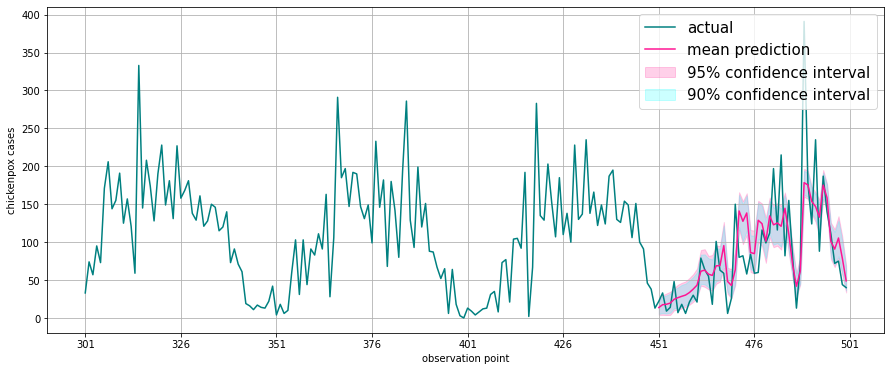

In [10]:
# import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from torch import optim
import torch.nn as nn
import numpy as np


# os.chdir("C:/Users/tonyz/Desktop/GRUVAE/model")
# import gruvae
# import train
# from data_loader_chickenpox import create_inout_sequences
# from functions import sample_from_normal


# os.chdir("C:/Users/tonyz/Desktop/GRUVAE/data/usingmean")

data = pd.read_csv("chickenpox.csv")
data = data[["PEST","BACS","KOMAROM","HEVES","BUDAPEST"]] 

train_steps = 300
val_steps = 150


tw = 10
train_size = train_steps/tw
validation_size = int(val_steps/tw)
test_size = int(len(data)//tw-train_size)
print(test_size)
train_loader, test_loader,scaler = create_inout_sequences_chick(data, tw, test_size)

torch.manual_seed(0)
gruVAE = GRUVAE(4,128,128,1,50,4)
vae_trainer = AutoEncoderTrainer(gruVAE, optim.Adam, train_loader, test_loader, validation_size)
model_list, val_loss_list = vae_trainer.train_and_evaluate(150)

val, idx = min((val, idx) for (idx, val) in enumerate(val_loss_list))
model = model_list[idx]



def inverse(y, scaler):
    d = torch.cat([torch.tensor(y),torch.tensor(y),\
                  torch.tensor(y),torch.tensor(y),torch.tensor(y)], dim=-1).numpy()
    d = scaler.inverse_transform(d)
    return d


torch.manual_seed(0)
prev_x = test_loader.dataset.tensors[0][:validation_size][-1].to("cuda")
prev_y = test_loader.dataset.tensors[1][:validation_size][-1].to("cuda")
print( test_loader.dataset.tensors[0][:validation_size].view(-1,4).shape)


def compute_last_h(trials, prev_x, prev_y):
    errors = []
    h_list = []
    metric = nn.MSELoss()
    reconstruction_list = []
    for i in range(trials):
        _, reconstructions, hidden_states, _, _, _, _, _ = model(prev_x, prev_y)
        errors.append(metric(torch.stack(reconstructions).view(-1)[-1], prev_y[1:][-1]))
        h_list.append(hidden_states)
        reconstruction_list.append(torch.stack(reconstructions).detach().to("cpu").numpy())
    val, idx = min((val, idx) for (idx, val) in enumerate(errors))
    return h_list[idx][-1], reconstruction_list[idx]

last_val_h, reconstructions = compute_last_h(500, prev_x, prev_y)


pred_size = 50

new_x = test_loader.dataset.tensors[0][validation_size:].view(-1,4).to("cuda")
new_y = test_loader.dataset.tensors[1][validation_size:].view(-1)
new_y = inverse(new_y.view(-1,1),scaler)[:,4]
print(new_x.shape)
def make_predictions(model, pred_size, h_start, scaler, new_x):
    predicted_prices = []
    Z_t = torch.zeros(model.Z_size).to("cuda").unsqueeze(0).unsqueeze(0)
    h_t = h_start.to("cuda").unsqueeze(0).unsqueeze(0)
    hs = []
    for i in range(pred_size):
        new_Z = model.Z_prior(h_start)
        new_Z = torch.chunk(new_Z, 2, dim=-1)
        Z_std = torch.exp(0.5*new_Z[1])
        new_Z = sample_from_normal(new_Z[0],Z_std)

        att,draw = model.laten_att(h_t,h_start)
        x_prime = torch.cat([att,new_Z,new_x[i].view(-1).float()])
        h_start, ppp = model.run_GRU(x_prime,h_start)
        h_t = torch.cat((h_t,h_start.unsqueeze(0).unsqueeze(0)),0)
        hs.append(h_start)
    for i in range(pred_size):
        _,predicted_price,_ = model.reconstruct(hs[i])
        predicted_price = predicted_price.to("cpu")
        predicted_price = inverse(predicted_price.view(-1,1),scaler)[:,4]
        predicted_prices.append(max(predicted_price,0))
    
    return predicted_prices,draw
    
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))/torch.mean(torch.tensor(y))
def trial(trials, model, hidden_states, pred_size, new_x):
    predictions = []
    upper_90 = []
    lower_90 = []
    upper_95 = []
    lower_95 = []
    mean = []
    for i in range(trials):
        predicted_prices,draw = make_predictions(model, pred_size, hidden_states, scaler, new_x)
        predicted_prices = np.vstack(predicted_prices)
        predictions.append(predicted_prices)
       
    predictions = np.concatenate(predictions, axis=1)
        
    for j in range(pred_size):
        temp = predictions[j]
        upper_90.append(np.percentile(temp,95))
        lower_90.append(np.percentile(temp,5))
        upper_95.append(np.percentile(temp,97.5))
        lower_95.append(np.percentile(temp,2.5))
        mean.append(np.mean(temp))
    print(pred_size,RMSELoss(torch.tensor(mean),new_y[:pred_size]))
    return upper_90, lower_90, upper_95, lower_95, mean,draw


u_90, l_90, u_95, l_95, m,draw = trial(500, model, last_val_h, pred_size, new_x) #COMPUTE MEAN AND CONF INTERVALS

###################################################################################
#RUN THIS BLOCK TO PLOT GRAPH
offset = 200
plt.rcParams["figure.figsize"] = (15,6)
actual_values = data["BUDAPEST"].tolist()[:tw*(len(data)//tw)]
end_idx = val_steps+pred_size+train_steps
start_idx = end_idx-pred_size-val_steps
actual_range = actual_values[start_idx:end_idx]

validation_end = len(actual_range) - pred_size + 1
validation_start = validation_end - val_steps
min_val = min(actual_range[validation_start:validation_end])
max_val = max(actual_range[validation_start:validation_end])


plt.plot(actual_range,color="teal", label="actual")
plt.plot([i+val_steps for i in range(len(m))],m, color="deeppink", label="mean prediction")
plt.fill_between([i+val_steps for i in range(len(m))], u_95, l_95,
                 color='deeppink', alpha=0.2, label="95% confidence interval")
plt.fill_between([i+val_steps for i in range(len(m))], u_90, l_90,
                 color='cyan', alpha=0.2, label="90% confidence interval")

plt.xlabel("observation point")
plt.ylabel("chickenpox cases")

plt.legend(loc="upper right", prop={"size":15})
plt.grid()
ticks,labels = plt.xticks()
ticks = np.array(list(ticks)[1:-1]).astype(int)
labels = ticks+301
plt.xticks(ticks, labels)
# plt.savefig("atth.png")
pred_list = [5,10,15,20,25,30,40,50]
for i in pred_list:
  u_90, l_90, u_95, l_95, m,_= trial(500, model, last_val_h, i, new_x)

	Epoch: 0, Train Loss: 526.5980, Validation Loss: 1.1459
	Epoch: 1, Train Loss: 502.8887, Validation Loss: 1.1061
	Epoch: 2, Train Loss: 481.8388, Validation Loss: 1.0580
	Epoch: 3, Train Loss: 462.7076, Validation Loss: 1.0751
	Epoch: 4, Train Loss: 447.1903, Validation Loss: 1.0413
	Epoch: 5, Train Loss: 434.0297, Validation Loss: 1.0046
	Epoch: 6, Train Loss: 422.6401, Validation Loss: 0.9849
	Epoch: 7, Train Loss: 412.8364, Validation Loss: 0.9901
	Epoch: 8, Train Loss: 404.9361, Validation Loss: 0.9029
	Epoch: 9, Train Loss: 397.7954, Validation Loss: 0.9784
	Epoch: 10, Train Loss: 388.6246, Validation Loss: 0.8877
	Epoch: 11, Train Loss: 384.6135, Validation Loss: 0.8396
	Epoch: 12, Train Loss: 379.0105, Validation Loss: 0.9193
	Epoch: 13, Train Loss: 377.6199, Validation Loss: 0.8166
	Epoch: 14, Train Loss: 371.5116, Validation Loss: 0.8378
	Epoch: 15, Train Loss: 365.6281, Validation Loss: 0.8157
	Epoch: 16, Train Loss: 361.9381, Validation Loss: 0.7800
	Epoch: 17, Train Loss: 

([<matplotlib.axis.XTick at 0x7f9e367f8a10>,
 [Text(0, 0, '5'),
  Text(0, 0, '55'),
  Text(0, 0, '105'),
  Text(0, 0, '155'),
  Text(0, 0, '205'),
  Text(0, 0, '255'),
  Text(0, 0, '305'),
  Text(0, 0, '355')])

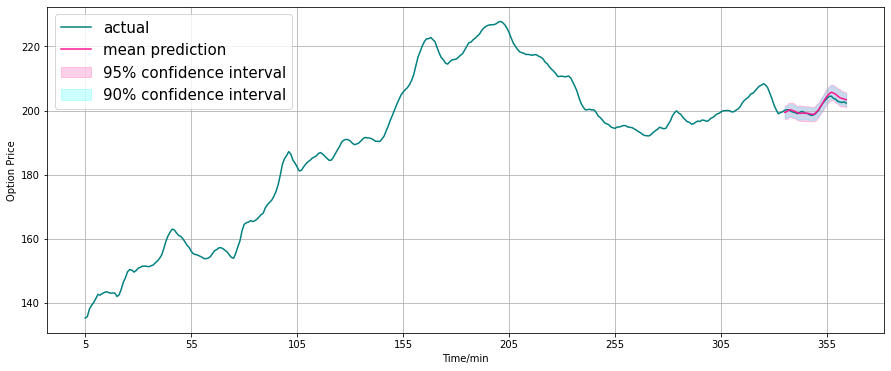

In [12]:

def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))/torch.mean(torch.tensor(y))

data = pd.read_csv("AMZN_put.csv").dropna()
data = data[["Stock","Option"]] 

train_steps = 300
val_steps = 30

tw = 10
train_size = train_steps/tw
validation_size = int(val_steps/tw)
test_size = int(len(data)//tw-train_size)

train_loader, test_loader,scaler = create_inout_sequences_opt(data, tw, test_size)

torch.manual_seed(0)
gruVAE = GRUVAE(1,64,64,1,50,4)
vae_trainer = AutoEncoderTrainer(gruVAE, optim.Adam, train_loader, test_loader, validation_size)
model_list, val_loss_list = vae_trainer.train_and_evaluate(300)

val, idx = min((val, idx) for (idx, val) in enumerate(val_loss_list))
model = model_list[idx]



def inverse(y, scaler):
    d = torch.cat([torch.tensor(y),torch.tensor(y)], dim=-1).numpy()
    d = scaler.inverse_transform(d)
    return d


torch.manual_seed(0)

prev_x = test_loader.dataset.tensors[0][:validation_size][-1].to("cuda")
prev_y = test_loader.dataset.tensors[1][:validation_size][-1].to("cuda")




def compute_last_h(trials, prev_x, prev_y):
    errors = []
    h_list = []
    hs_list = []
    metric = nn.MSELoss()
    reconstruction_list = []
    for i in range(trials):
        _, reconstructions, hidden_states, _, _, _, _, _ = model(prev_x, prev_y)
        errors.append(metric(torch.stack(reconstructions).view(-1)[-1], prev_y[1:][-1]))
        h_list.append(hidden_states)
        # hs_list.append(hs)

        reconstruction_list.append(torch.stack(reconstructions).detach().to("cpu").numpy())
    val, idx = min((val, idx) for (idx, val) in enumerate(errors))
    return h_list[idx][-1], reconstruction_list[idx]
last_val_h, reconstructions = compute_last_h(500, prev_x, prev_y)


pred_size = 30
new_x = test_loader.dataset.tensors[0][validation_size:].view(-1,1).to("cuda")
new_y = test_loader.dataset.tensors[1][validation_size:].view(-1)
new_y = inverse(new_y.view(-1,1),scaler)[:,1]

def make_predictions(model, pred_size, h_start, scaler, new_x):
    predicted_prices = []
    Z_t = torch.zeros(model.Z_size).to("cuda").unsqueeze(0).unsqueeze(0)
    h_t = h_start.to("cuda").unsqueeze(0).unsqueeze(0)
    hs = []
    for i in range(pred_size):
        new_Z = model.Z_prior(h_start)
        new_Z = torch.chunk(new_Z, 2, dim=-1)
        Z_std = torch.exp(0.5*new_Z[1])
        new_Z = sample_from_normal(new_Z[0],Z_std)
        att,draw = model.laten_att(h_t,h_start)
        x_prime = torch.cat([att,new_Z,new_x[i].view(-1).float()])
        h_start,_ = model.run_GRU(x_prime,h_start)
        h_t = torch.cat((h_t,h_start.unsqueeze(0).unsqueeze(0)),0)
        hs.append(h_start)
    for i in range(pred_size):
        _,predicted_price,_ = model.reconstruct(hs[i])
        predicted_price = predicted_price.to("cpu")
        predicted_price = inverse(predicted_price.view(-1,1),scaler)[:,1]
        predicted_prices.append(max(predicted_price,0))
    
    return predicted_prices,draw
def trial(trials, model, hidden_states, pred_size, new_x):
    predictions = []
    upper_90 = []
    lower_90 = []
    upper_95 = []
    lower_95 = []
    mean = []
    for i in range(trials):
        predicted_prices,_ = make_predictions(model, pred_size, hidden_states, scaler, new_x)
        predicted_prices = np.vstack(predicted_prices)
        predictions.append(predicted_prices)
       
    predictions = np.concatenate(predictions, axis=1)
        
    for j in range(pred_size):
        temp = predictions[j]
        upper_90.append(np.percentile(temp,95))
        lower_90.append(np.percentile(temp,5))
        upper_95.append(np.percentile(temp,97.5))
        lower_95.append(np.percentile(temp,2.5))
        mean.append(np.mean(temp))
    print(pred_size,RMSELoss(torch.tensor(mean),new_y[:pred_size]))

    return upper_90, lower_90, upper_95, lower_95, mean


u_90, l_90, u_95, l_95, m = trial(500, model, last_val_h, pred_size, new_x)

#############################################################################
#run this block to plot graph
offset = 200
plt.rcParams["figure.figsize"] = (15,6)
actual_values = data["Option"].tolist()[:tw*(len(data)//tw)]

end_idx = train_steps+val_steps+pred_size
actual_range = actual_values[:end_idx]

validation_end = len(actual_range) - pred_size + 1
validation_start = validation_end - val_steps
min_val = min(actual_range[validation_start:validation_end])
max_val = max(actual_range[validation_start:validation_end])


plt.plot(actual_range,color="teal", label="actual")
plt.plot([i+train_steps+val_steps for i in range(len(m))],m, color="deeppink", label="mean prediction")
plt.fill_between([i+train_steps+val_steps for i in range(len(m))], u_95, l_95,
                 color='deeppink', alpha=0.2, label="95% confidence interval")
plt.fill_between([i+train_steps+val_steps for i in range(len(m))], u_90, l_90,
                 color='cyan', alpha=0.2, label="90% confidence interval")

plt.xlabel("Time/min")
plt.ylabel("Option Price")
plt.legend(loc="upper left", prop={"size":15})
plt.grid()
ticks,labels = plt.xticks()
ticks = np.array(list(ticks)[1:-1]).astype(int)
labels = ticks+5
plt.xticks(ticks, labels)

# pred_list = [5,10,15,20,25,30]
# for i in pred_list:
#   u_90, l_90, u_95, l_95, m= trial(500, model, last_val_h, i, new_x)

	Epoch: 0, Train Loss: 2125.8743, Validation Loss: 23.9545
	Epoch: 1, Train Loss: 2027.1524, Validation Loss: 23.7076
	Epoch: 2, Train Loss: 1941.2487, Validation Loss: 23.7717
	Epoch: 3, Train Loss: 1867.5669, Validation Loss: 23.3266
	Epoch: 4, Train Loss: 1802.4436, Validation Loss: 23.2657
	Epoch: 5, Train Loss: 1749.0154, Validation Loss: 23.1613
	Epoch: 6, Train Loss: 1700.6723, Validation Loss: 23.0607
	Epoch: 7, Train Loss: 1664.1627, Validation Loss: 22.5660
	Epoch: 8, Train Loss: 1627.1750, Validation Loss: 22.3144
	Epoch: 9, Train Loss: 1600.9114, Validation Loss: 21.9768
	Epoch: 10, Train Loss: 1569.1211, Validation Loss: 21.4968
	Epoch: 11, Train Loss: 1547.8915, Validation Loss: 21.6949
	Epoch: 12, Train Loss: 1532.8593, Validation Loss: 20.8648
	Epoch: 13, Train Loss: 1511.3240, Validation Loss: 22.2109
	Epoch: 14, Train Loss: 1496.2614, Validation Loss: 20.1542
	Epoch: 15, Train Loss: 1476.6104, Validation Loss: 21.2845
	Epoch: 16, Train Loss: 1457.2997, Validation Loss

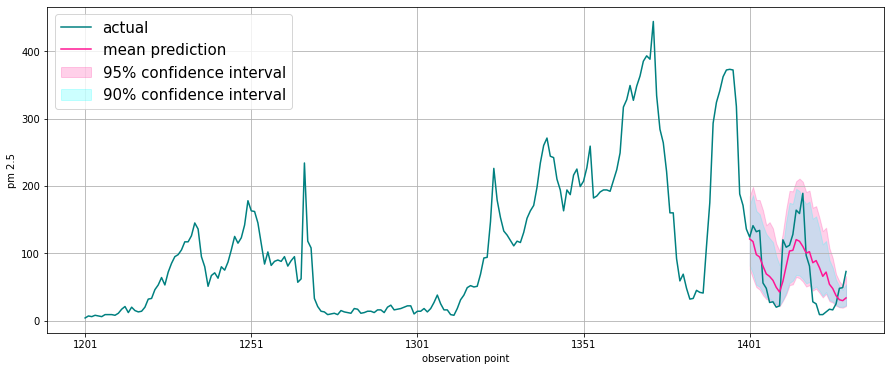

In [13]:
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from torch import optim
import torch.nn as nn
import numpy as np



data = pd.read_csv("beijingpm.csv")
data = data[["Temperature","Pressure","WindSpeed","DewPoint","Rainfall","Snow","pm2.5"]] 


train_steps = 1200
val_steps = 200

tw = 10
train_size = train_steps/tw
validation_size = int(val_steps/tw)
test_size = int(len(data)//tw-train_size)


train_loader, test_loader,scaler = create_inout_sequences_pm(data, tw, test_size)

torch.manual_seed(0)
gruVAE = GRUVAE(6,64,64,1,50,4)
vae_trainer = AutoEncoderTrainer(gruVAE, optim.Adam, train_loader, test_loader, validation_size)
model_list, val_loss_list = vae_trainer.train_and_evaluate(300) 


val, idx = min((val, idx) for (idx, val) in enumerate(val_loss_list))
model = model_list[idx]



def inverse(y, scaler):
    d = torch.cat([torch.tensor(y),torch.tensor(y),\
                  torch.tensor(y),torch.tensor(y),torch.tensor(y),torch.tensor(y),torch.tensor(y)], dim=-1).numpy()
    d = scaler.inverse_transform(d)
    return d


torch.manual_seed(0)
prev_x = test_loader.dataset.tensors[0][:validation_size][-1].to("cuda")
prev_y = test_loader.dataset.tensors[1][:validation_size][-1].to("cuda")



def compute_last_h(trials, prev_x, prev_y):
    errors = []
    h_list = []
    metric = nn.MSELoss()
    reconstruction_list = []
    for i in range(trials):
        # print(prev_x.shape)
        _, reconstructions, hidden_states, _, _, _, _, _ = model(prev_x, prev_y)
        errors.append(metric(torch.stack(reconstructions).view(-1)[-1], prev_y[1:][-1]))
        h_list.append(hidden_states)
        reconstruction_list.append(torch.stack(reconstructions).detach().to("cpu").numpy())
    val, idx = min((val, idx) for (idx, val) in enumerate(errors))
    return h_list[idx][-1], reconstruction_list[idx]

last_val_h, reconstructions = compute_last_h(500, prev_x, prev_y)


pred_size = 30
new_x = test_loader.dataset.tensors[0][validation_size:].view(-1,6).to("cuda")
new_y = test_loader.dataset.tensors[1][validation_size:].view(-1)
new_y = inverse(new_y.view(-1,1),scaler)[:,6]


def make_predictions(model, pred_size, h_start, scaler, new_x):
    predicted_prices = []
    Z_t = torch.zeros(model.Z_size).to("cuda").unsqueeze(0).unsqueeze(0)
    h_t = h_start.to("cuda").unsqueeze(0).unsqueeze(0)
    hs = []
    for i in range(pred_size):
        new_Z = model.Z_prior(h_start)
        new_Z = torch.chunk(new_Z, 2, dim=-1)
        Z_std = torch.exp(0.5*new_Z[1])
        new_Z = sample_from_normal(new_Z[0],Z_std)

        att,draw = model.laten_att(h_t,h_start)
        x_prime = torch.cat([att,new_Z,new_x[i].view(-1).float()])
        h_start,_ = model.run_GRU(x_prime,h_start)
        h_t = torch.cat((h_t,h_start.unsqueeze(0).unsqueeze(0)),0)
        hs.append(h_start)
    for i in range(pred_size):
        _,predicted_price,_ = model.reconstruct(hs[i])
        predicted_price = predicted_price.to("cpu")
        predicted_price = inverse(predicted_price.view(-1,1),scaler)[:,6]
        predicted_prices.append(max(predicted_price,0))
    
    return predicted_prices
    

def trial(trials, model, hidden_states, pred_size, new_x):
    predictions = []
    upper_90 = []
    lower_90 = []
    upper_95 = []
    lower_95 = []
    mean = []
    for i in range(trials):
        predicted_prices = make_predictions(model, pred_size, hidden_states, scaler, new_x)
        predicted_prices = np.vstack(predicted_prices)
        predictions.append(predicted_prices)
       
    predictions = np.concatenate(predictions, axis=1)
        
    for j in range(pred_size):
        temp = predictions[j]
        upper_90.append(np.percentile(temp,95))
        lower_90.append(np.percentile(temp,5))
        upper_95.append(np.percentile(temp,97.5))
        lower_95.append(np.percentile(temp,2.5))
        mean.append(np.mean(temp))
    print(pred_size,RMSELoss(torch.tensor(mean),new_y[:pred_size]))

    return upper_90, lower_90, upper_95, lower_95, mean


u_90, l_90, u_95, l_95, m = trial(1000, model, last_val_h, pred_size, new_x)

  
############################################################################
offset = 200
plt.rcParams["figure.figsize"] = (15,6)
actual_values = data["pm2.5"].tolist()[:tw*(len(data)//tw)]

end_idx = val_steps+pred_size+train_steps
start_idx = end_idx-pred_size-val_steps
actual_range = actual_values[start_idx:end_idx]


validation_end = len(actual_range) - pred_size + 1
validation_start = validation_end - val_steps
min_val = min(actual_range[validation_start:validation_end])
max_val = max(actual_range[validation_start:validation_end])


plt.plot(actual_range,color="teal", label="actual")
plt.plot([i+val_steps for i in range(len(m))],m, color="deeppink", label="mean prediction")
plt.fill_between([i+val_steps for i in range(len(m))], u_95, l_95,
                 color='deeppink', alpha=0.2, label="95% confidence interval")
plt.fill_between([i+val_steps for i in range(len(m))], u_90, l_90,
                 color='cyan', alpha=0.2, label="90% confidence interval")

plt.xlabel("observation point")
plt.ylabel("pm 2.5")
plt.legend(loc="upper left",  prop={"size":15})
plt.grid()
ticks,labels = plt.xticks()
ticks = np.array(list(ticks)[1:-1]).astype(int)
labels = ticks+1201
plt.xticks(ticks, labels)
pred_list = [5,10,15,20,25,30,40,50]
plt.savefig("attenh_pm_30.png")
for i in pred_list:
  u_90, l_90, u_95, l_95, m = trial(500, model, last_val_h, i, new_x)
#######################################
